 # EDA case study on loan dataset

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from matplotlib.text import Text

In [17]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

In [18]:
df = pd.read_csv('C:\\Users\\thani\\OneDrive\\Desktop\\EDA_Project\\loan.csv', low_memory=False)

## Data Review and Data Cleaning

In [19]:
# Find the shape of dataframe.
print(df.shape)

(39717, 111)


In [20]:
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [21]:
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status i

In [22]:
print(df.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

## Data Type Observations
      1.Term, zip_code are objects. Upon review of the data , there appears no value in converting this to a numeric variable They can continue to be considered as a categorical variables. Clean up necessary for additional signs / words
      2.int_rate, emp_length are objects and will need to be converted to floats
      3. issue_d app, earliest_cr_line, last_pymnt_d, next_pymnt_d ,last_credit_pull_d
      are objects and will need to be converted to dates

### Null Value Observations

In [23]:
# Finding the percentage of  missing values in each columns.
print((df.isnull().sum() * 100 / len(df)).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [24]:
# Finding the columns having 100% missing values.
print(len(df.columns[df.isnull().sum() * 100 / len(df) == 100]))

54


--There are exactly 54 columns having 100% missing values.

In [25]:
# Finding the columns having 90% missing values.
print(len(df.columns[df.isnull().sum() * 100 / len(df) > 90]))

56


--There are precisely 56 columns that have a missing value percentage of over 90%.

In [26]:
# Dropping columns having missing values more than 90%
missing_columns = df.columns[df.isnull().sum() * 100 / len(df.index) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [27]:
df.drop(missing_columns, axis=1, inplace=True)
print(df.shape)

(39717, 55)


In [28]:
# Dropping columns having higher missing values.
print((df.isnull().sum() * 100 / len(df.index)).sort_values(ascending=False))


mths_since_last_delinq        64.662487
desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_acc                      0.000000
total_pymnt_inv                0.000000
recoveries                     0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
pub_rec                        0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000


In [29]:
missing_columns_2 = df.columns[df.isnull().sum() * 100 / len(df.index) > 30]
print(missing_columns_2)

Index(['desc', 'mths_since_last_delinq'], dtype='object')


In [30]:
# mths_since_last_delinq, desc columns have more than 30% missing values so we dropping them
df.drop(missing_columns_2, axis=1, inplace=True)
print(df.shape)

(39717, 53)


In [31]:
# Finding number of  rows having more than 5 missing values.
print(df.isnull().sum(axis=1))

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64


In [32]:
print(len(df[df.isnull().sum(axis=1) > 5]))

0


In [33]:
# There is no rows with missing values greater 4
print(df.shape)

(39717, 53)


In [34]:
# Finding the columns having unique values only.
unique_col_1 = df.columns[df.nunique() == 1]
print(unique_col_1)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [35]:
print(len(unique_col_1))

9


--There are 9 columns with one unique values.

In [36]:
# Checking the unique values present in the columns.
for i in unique_col_1:
    print('column_name:\t{}'.format(i))
    print('\tUnique Values: {}\n'.format(df[i].unique()))

column_name:	pymnt_plan
	Unique Values: ['n']

column_name:	initial_list_status
	Unique Values: ['f']

column_name:	collections_12_mths_ex_med
	Unique Values: [ 0. nan]

column_name:	policy_code
	Unique Values: [1]

column_name:	application_type
	Unique Values: ['INDIVIDUAL']

column_name:	acc_now_delinq
	Unique Values: [0]

column_name:	chargeoff_within_12_mths
	Unique Values: [ 0. nan]

column_name:	delinq_amnt
	Unique Values: [0]

column_name:	tax_liens
	Unique Values: [ 0. nan]



-- olumns with only one unique value are being dropped as they do not contribute to the overall data analysis.

-- Examples of such columns include'pymnt_plan' with only 'n' values, 'initial_list_status' with only 'f' values,'policy_code' with only '1' values,         and 'application_type' with only 'INDIVIDUAL' values. Furthermore, columns such as 'acc_now_delinq', 'chargeoff_within_12_mths',
    'delinq_amnt', 'tax_liens', and 'collections_12_mths_ex_med' with only '0' values are also being eliminated as they do not present any meaningful        information for analysis.

In [37]:
# Dropping unique value columns
df.drop(unique_col_1, inplace=True, axis=1)
print(df.shape)

(39717, 44)


-- The columns will be categorized based on the available pre and post-loan data.
-- This will enable us to remove the **post-loan variables** and conduct a thorough analysis of the loan acceptance drivers.

In [38]:
# Drooping the post loan data and others.
post_loan_data = ['collection_recovery_fee', 'delinq_2yrs',
                  'inq_last_6mths', 'last_credit_pull_d',
                  'last_pymnt_amnt', 'last_pymnt_d',
                  'out_prncp', 'out_prncp_inv',
                  'total_acc', 'total_pymnt',
                  'total_pymnt_inv', 'total_rec_int',
                  'total_rec_late_fee',
                  'total_rec_prncp'
                  ]
others_extra = ['earliest_cr_line',
                'open_acc',
                'pub_rec',
                'recoveries'
                ]
post_loan_data = post_loan_data + others_extra

In [39]:
df.drop(post_loan_data, axis=1, inplace=True)
print(df.shape)

(39717, 26)


In [40]:
# Dropping other unwanted columns.
unwanted_col = ['member_id', 'zip_code', 'addr_state', 'url', 'title',
                'emp_title', 'revol_bal', 'revol_util', 'pub_rec_bankruptcies']

In [41]:
df.drop(unwanted_col, axis=1, inplace=True)
print(df.shape)

(39717, 17)


### Filtering data.
    Filtering the data by loan-status column.
    subsetting loan_status columns either are charge off and fully paid

Target variable is **loan status** column.

In [42]:
# Removing current loans.
print(df['loan_status'].value_counts())

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


In [43]:
df = df[df['loan_status'] != 'Current']
print(df.shape)

(38577, 17)


In [44]:
# Finding percentage of missing values in each columns.
print(df.isnull().mean().mul(100).sort_values(ascending=False))

emp_length             2.677761
id                     0.000000
purpose                0.000000
loan_status            0.000000
issue_d                0.000000
verification_status    0.000000
annual_inc             0.000000
home_ownership         0.000000
sub_grade              0.000000
loan_amnt              0.000000
grade                  0.000000
installment            0.000000
int_rate               0.000000
term                   0.000000
funded_amnt_inv        0.000000
funded_amnt            0.000000
dti                    0.000000
dtype: float64


In [45]:
# emp_length is only column with missing values.

### Fixing the values

In [46]:
print(df['emp_length'].value_counts())

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64


In [47]:
# Removing years, +, <''' .
df['emp_length'] = df['emp_length'].replace(
    to_replace=['10+ years', '< 1 year', '2 years', '3 years', '4 years',
                '5 years', '1 year', '6 years', '7 years',
                '8 years', '9 years'],
    value=[10, 0.5, 2, 3, 4, 5, 1, 6, 7, 8, 9])

In [48]:
print(df['emp_length'].isnull().sum())

1033


-- Around 1033 values are missing the emp_length column and these values need to be filled with mode.

In [49]:
# Filling the missing values with mode.
print(df['emp_length'].value_counts())

emp_length
10.0    8488
0.5     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64


In [50]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [51]:
# Finding percentage of missing values.
print(df.isnull().mean().mul(100).sort_values(ascending=False))

id                     0.0
emp_length             0.0
purpose                0.0
loan_status            0.0
issue_d                0.0
verification_status    0.0
annual_inc             0.0
home_ownership         0.0
sub_grade              0.0
loan_amnt              0.0
grade                  0.0
installment            0.0
int_rate               0.0
term                   0.0
funded_amnt_inv        0.0
funded_amnt            0.0
dti                    0.0
dtype: float64


-- There is no null values in dataset.

In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   loan_amnt            38577 non-null  int64  
 2   funded_amnt          38577 non-null  int64  
 3   funded_amnt_inv      38577 non-null  float64
 4   term                 38577 non-null  object 
 5   int_rate             38577 non-null  object 
 6   installment          38577 non-null  float64
 7   grade                38577 non-null  object 
 8   sub_grade            38577 non-null  object 
 9   emp_length           38577 non-null  float64
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  purpose              38577 non-null  obje

-- int_rate, term, issue_d  above column must be convert into float, int, date and time respectively.

In [53]:
# Removing the '%' symbol from the int_rate column and changing the data type from object to
# float.
df['int_rate'] = df['int_rate'].str.replace("%", "")
df['int_rate'] = df['int_rate'].astype('float64')
print(df['int_rate'].describe())

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64


In [54]:
print(df['int_rate'].value_counts())

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64


In [55]:
#  Removing  'months' from the term column and changing the date type from object to int.
df['term'] = df['term'].str.replace("months", "")
df['term'] = df['term'].astype('int')
print(df['term'].describe())

count    38577.000000
mean        41.898437
std         10.333136
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64


In [56]:
print(df["term"].value_counts())

term
36    29096
60     9481
Name: count, dtype: int64


In [57]:
# In issue_d column,changing the datatype of column from object to datatime64.
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   38577 non-null  int64         
 1   loan_amnt            38577 non-null  int64         
 2   funded_amnt          38577 non-null  int64         
 3   funded_amnt_inv      38577 non-null  float64       
 4   term                 38577 non-null  int32         
 5   int_rate             38577 non-null  float64       
 6   installment          38577 non-null  float64       
 7   grade                38577 non-null  object        
 8   sub_grade            38577 non-null  object        
 9   emp_length           38577 non-null  float64       
 10  home_ownership       38577 non-null  object        
 11  annual_inc           38577 non-null  float64       
 12  verification_status  38577 non-null  object        
 13  issue_d              38577 non-null 

In [58]:
# Extracting month and year from issue_d column.
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year
print(df['issue_month'].value_counts())

issue_month
12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: count, dtype: int64


In [59]:
print(df['issue_year'].value_counts())

issue_year
2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: count, dtype: int64


check for duplicate rows in dataset.

In [60]:
print(df.loc[df.duplicated()])

Empty DataFrame
Columns: [id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, dti, issue_month, issue_year]
Index: []


-- There is no duplicate values in dataset.

In [61]:
# checking any duplicate rows in 'id' column.
print(df.loc[df.duplicated(subset=['id'])])

Empty DataFrame
Columns: [id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, dti, issue_month, issue_year]
Index: []


In [62]:
print(df.duplicated(subset=['id']).sum())

0


-- There is no duplicate values in 'id' column.

## Data analysis
    The dataset is large, so some columns have been binned to convert continuous data into categorical data for easier analysis and visualization. Interest rate, loan amount, annual income, employee length, debt-to-income ratio, and loan-to-income ratio are sorted into four categories based on their quartile values (25%,50%, and 75%).

#### Creating bins on annual_incomes.

In [63]:
def bins_income(ann_inc):
    if ann_inc < 41000:
        return 'Low'
    if 41000 <= ann_inc <= 59999:
        return 'Medium'
    if 60000 <= ann_inc <= 82999:
        return 'High'
    else:
        return 'very High'

In [64]:
df['annual_inc_bins'] = df['annual_inc'].apply(lambda x: bins_income(x))

In [65]:
# Creating bins on int_rate.
df['int_rate_bins'] = pd.cut(x=df['int_rate'],
                             bins=[0, 9, 11.99, 13.99, 100],
                             labels=['Low', 'Medium', 'High', 'Very High'])
print(df['int_rate_bins'].value_counts())

int_rate_bins
Medium       10853
Very High    10657
Low           9808
High          7259
Name: count, dtype: int64


In [66]:
# Creating bins on loan_amt.
df['loan_amount_bins'] = pd.cut(x=df['loan_amnt'],
                                bins=[0, 5400, 9600, 15000, 10000000],
                                labels=['Low', 'Medium', 'High', 'Very High'])
print(df['loan_amount_bins'].value_counts())

loan_amount_bins
High         10645
Low           9768
Medium        9544
Very High     8620
Name: count, dtype: int64


In [67]:
# Creating bins on emp_length.
df['emp_length_bins'] = pd.cut(x=df['emp_length'],
                               bins=[0, 2, 4, 9, 100],
                               labels=['Entry Level', 'Junior Level', 'Middle Level', 'Senior Level'])

In [68]:
print(df['emp_length_bins'].value_counts())

emp_length_bins
Entry Level     11968
Middle Level     9734
Senior Level     9521
Junior Level     7354
Name: count, dtype: int64


#### Creating bins on dti.

In [69]:
def dti_bin(dti):
    if dti < 8:
        return 'Low'
    if 8 <= dti <= 12.99:
        return 'Medium'
    if 13 <= dti <= 18.99:
        return 'High'
    else:
        return 'Very High'

In [70]:
df['dti_bins'] = df['dti'].apply(lambda x: dti_bin(x))
print(df['dti_bins'].value_counts())

dti_bins
High         11107
Low           9411
Medium        9160
Very High     8899
Name: count, dtype: int64


In [71]:
# Creating loan_to_income column and binning the column.
df["loan_to_income"] = df['loan_amnt'] * 100 / (df['annual_inc'])
print(df['loan_to_income'].value_counts())

loan_to_income
20.000000    642
16.666667    553
10.000000    462
25.000000    440
33.333333    361
            ... 
43.777778      1
12.856225      1
13.891258      1
12.332281      1
7.162162       1
Name: count, Length: 12320, dtype: int64


In [75]:
def lti_bin(loan_to_income):
    if loan_to_income < 10:
        return 'Low'
    if 10 <= loan_to_income <= 16.99:
        return 'Medium'
    if 17 <= loan_to_income <= 24.99:
        return 'High'
    else:
        return 'Very High'

In [76]:
df['lti_bins'] = df['loan_to_income'].apply(lambda x: lti_bin(x))
print(df['dti_bins'].value_counts())

dti_bins
High         11107
Low           9411
Medium        9160
Very High     8899
Name: count, dtype: int64


In [77]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   38577 non-null  int64         
 1   loan_amnt            38577 non-null  int64         
 2   funded_amnt          38577 non-null  int64         
 3   funded_amnt_inv      38577 non-null  float64       
 4   term                 38577 non-null  int32         
 5   int_rate             38577 non-null  float64       
 6   installment          38577 non-null  float64       
 7   grade                38577 non-null  object        
 8   sub_grade            38577 non-null  object        
 9   emp_length           38577 non-null  float64       
 10  home_ownership       38577 non-null  object        
 11  annual_inc           38577 non-null  float64       
 12  verification_status  38577 non-null  object        
 13  issue_d              38577 non-null 

In [78]:
# Finding the percentage of  missing values in each columns after binning.
print((df.isnull().sum() * 100 / len(df)).sort_values(ascending=False))

id                     0.0
loan_amnt              0.0
loan_to_income         0.0
dti_bins               0.0
emp_length_bins        0.0
loan_amount_bins       0.0
int_rate_bins          0.0
annual_inc_bins        0.0
issue_year             0.0
issue_month            0.0
dti                    0.0
purpose                0.0
loan_status            0.0
issue_d                0.0
verification_status    0.0
annual_inc             0.0
home_ownership         0.0
emp_length             0.0
sub_grade              0.0
grade                  0.0
installment            0.0
int_rate               0.0
term                   0.0
funded_amnt_inv        0.0
funded_amnt            0.0
lti_bins               0.0
dtype: float64


-- After binning there  is no missing values.

In [79]:
print(df['loan_status'].value_counts())

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64


### univariate analysis:

In [149]:
def univariante_analysis(col):
    sns.set(font_scale=0.9,rc={"figure.dpi":100, 'savefig.dpi':300})
    plt.figure(figsize=(6, 6))
    ax = sns.countplot(x=df[col], width=0.3)
    ht = []
    for p in ax.patches:
        x = p.get_height()
        ht.append(x)
    for p in ax.patches:
        txt = round((p.get_height() * 100 / sum(ht)), 1)
        t = ax.annotate(str(txt) + '%', xy=(p.get_x() + 0.1, p.get_height() + 1), size=10, color='black')
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()

In [150]:
def univariate_numerical(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8))
    sns.boxplot(ax=ax[0], x=df[col])
    ax[0].set_title(col + " " + 'distribution')
    sns.distplot(ax=ax[1], x=df[col], bins=10)
    ax[1].set_title(col + " " + 'distribution')
    plt.show()

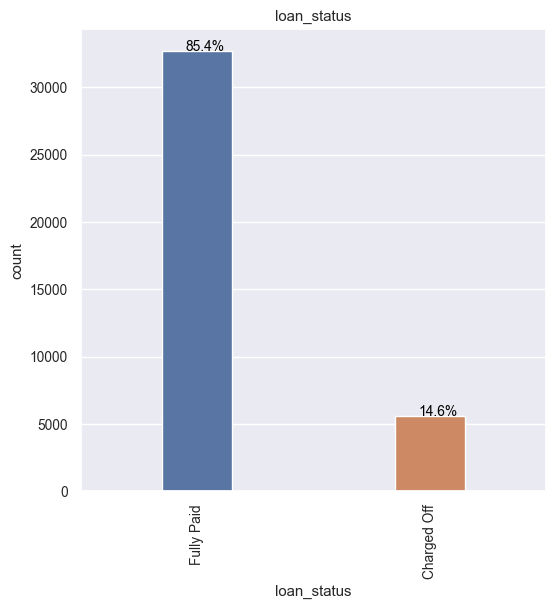

In [151]:
univariante_analysis('loan_status')

-- Out of all the applicants, only **14.6% have been charged off**.

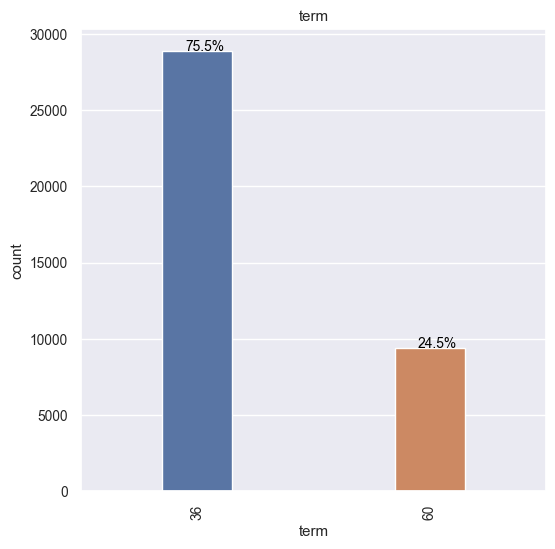

In [152]:
univariante_analysis('term')

--The majority  of loan applicants prefer **short-term loans**(36 months) and 
   long term loans (60 months ) roughly accounts only 25% of total of applications.

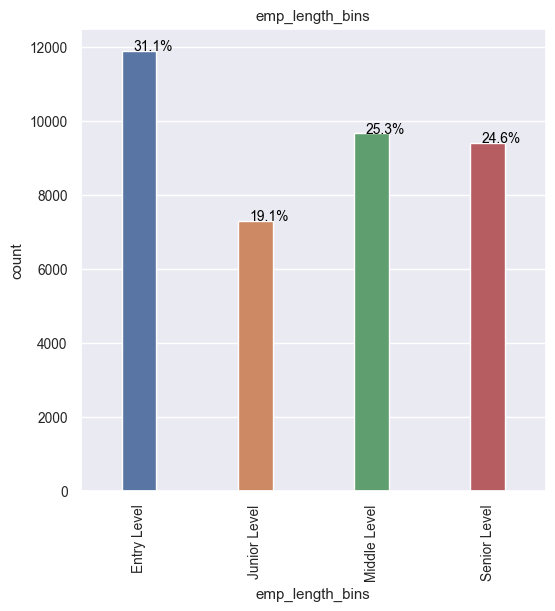

In [153]:
univariante_analysis('emp_length_bins')

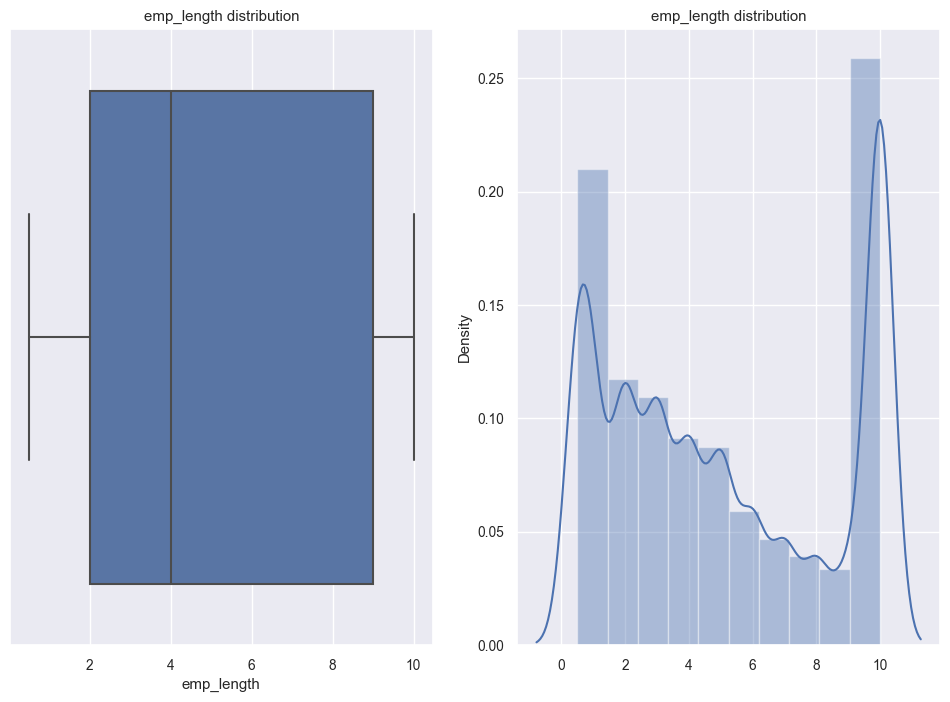

In [154]:
univariate_numerical('emp_length')

-- We categorized employee experience into four groups. Typically, **junior employees** with 0.5-2 years of experience
   have the highest percentage of loan applications, followed by middle and senior level employees.

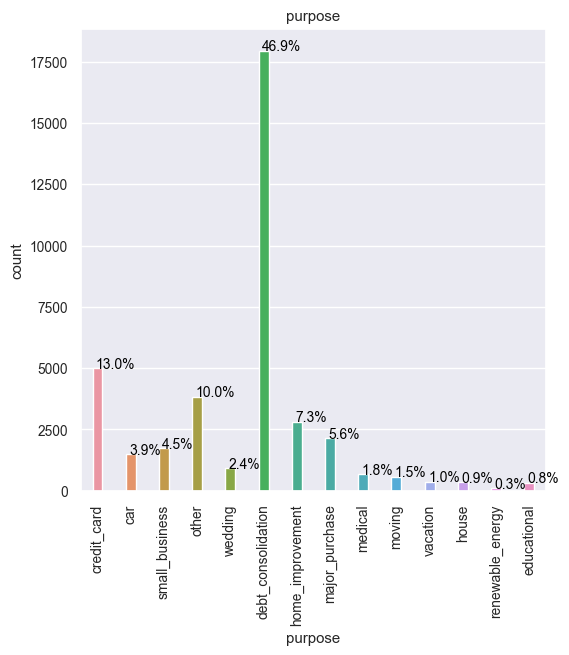

In [155]:
univariante_analysis('purpose')

-- A significant portion of loans, approximately 60%, have been utilized for the purpose of
   **debt consolidation(including credit)** and to tackle existing debt.

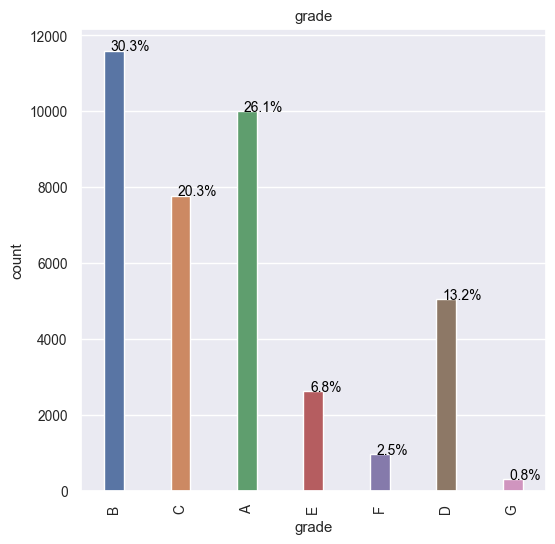

In [156]:
univariante_analysis('grade')

-- In general, most of the loan accounts comprise the **top 3 grades (A,B,C)** spanning about 75% of loans given.
   Top-quality loan applicants are relatively fewer than the B-grade applicants.

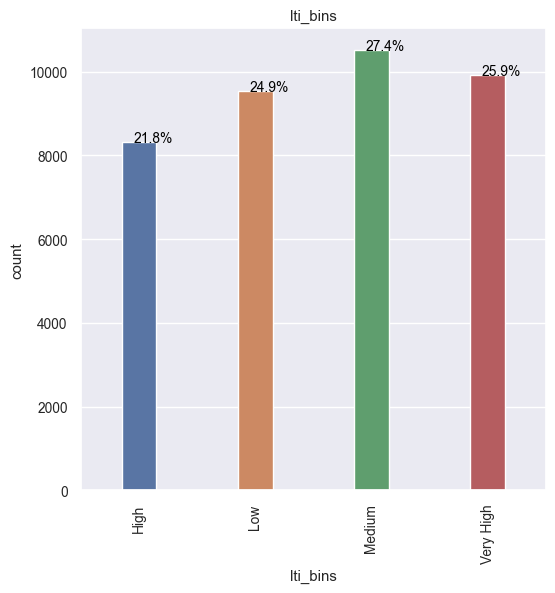

In [157]:
univariante_analysis('lti_bins')

-- The loan to income ratio has been categorized into four distinct categories.
   The majority of loan applicants fall into the **medium category(lti = 10-16)**, with the high category following closely behind.

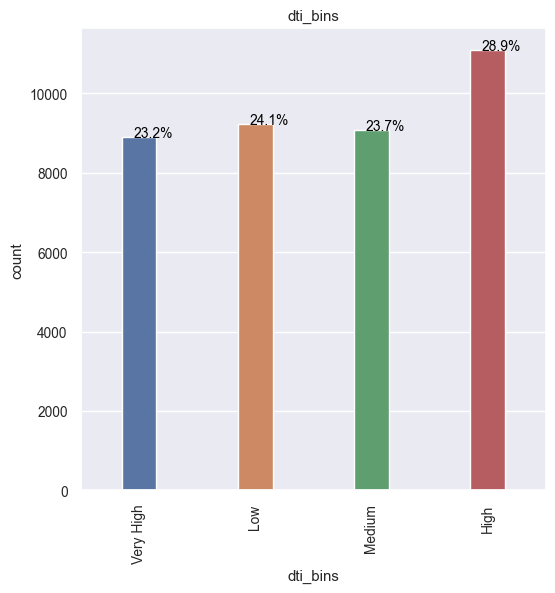

In [158]:
univariante_analysis('dti_bins')

-- We segmented the DTI into 4 categories.
   The **high category(dti = 13-18)** has the largest number of applicants, followed by the low category.

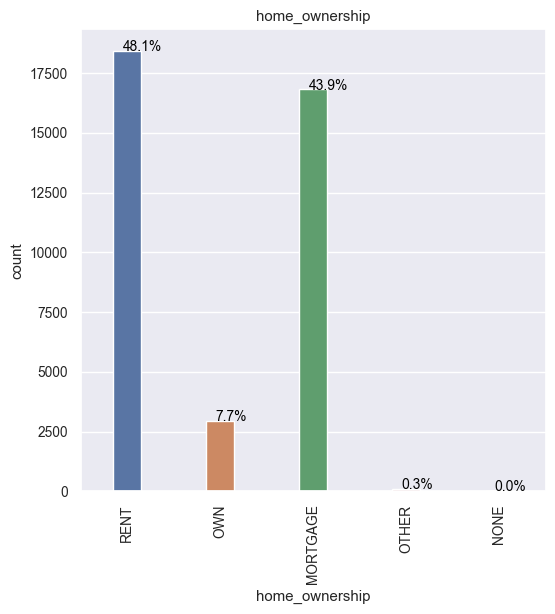

In [159]:
univariante_analysis('home_ownership')

-- Based on the data we have, it seems that the majority of loan applicants,
   approximately 90%, are either currently paying off a **mortgage or are renting** their homes.
   Only a small percentage, around 7%, are actually homeowners.

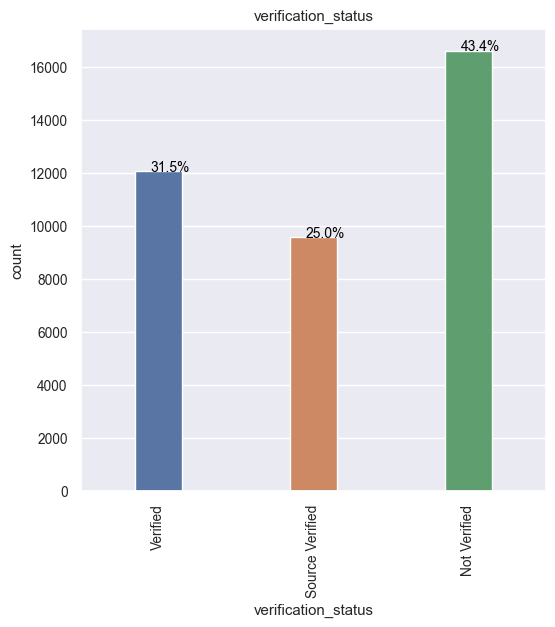

In [160]:
univariante_analysis('verification_status')

-- A large chunk of the loan applications appear to be in the **unverified status** and
   represents the risk of posing data quality and reliability of loan data to
   accurately evaluate members' ability to pay up the loan.

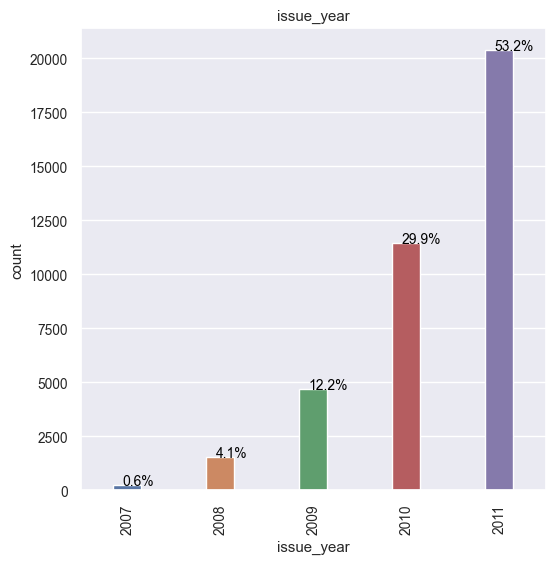

In [161]:
univariante_analysis('issue_year')

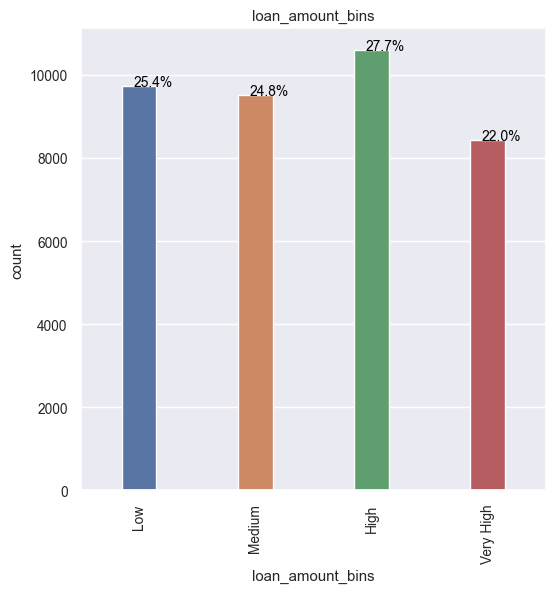

In [162]:
univariante_analysis('loan_amount_bins')

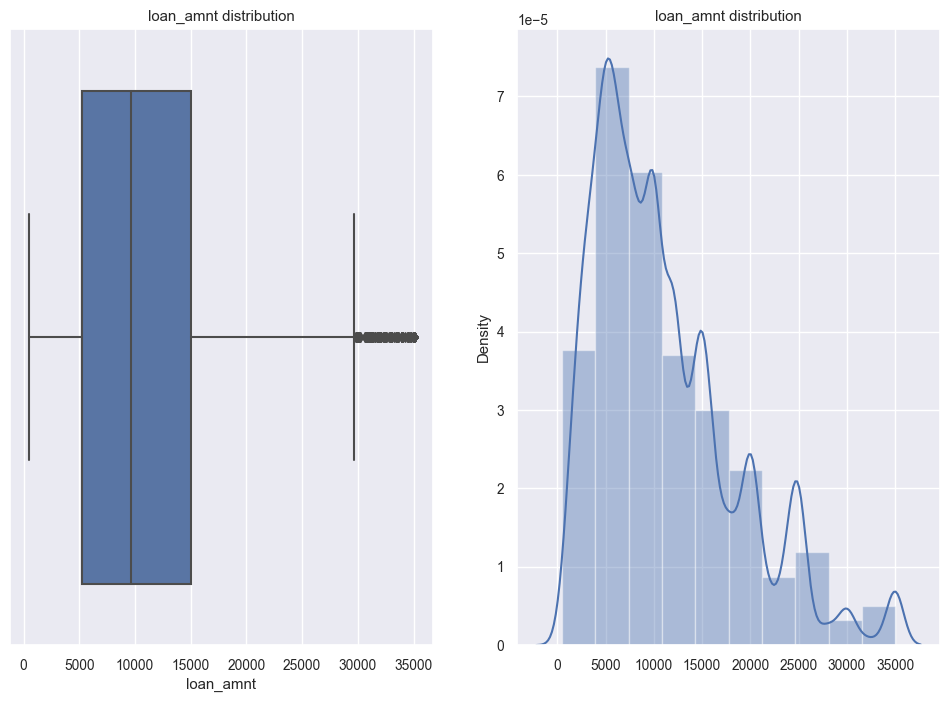

In [163]:
univariate_numerical('loan_amnt')

-- The **₹10,000** mark represents the **median loan amount** application.
   Notably, 75% of the applications have values less than or equal to ₹15,000.

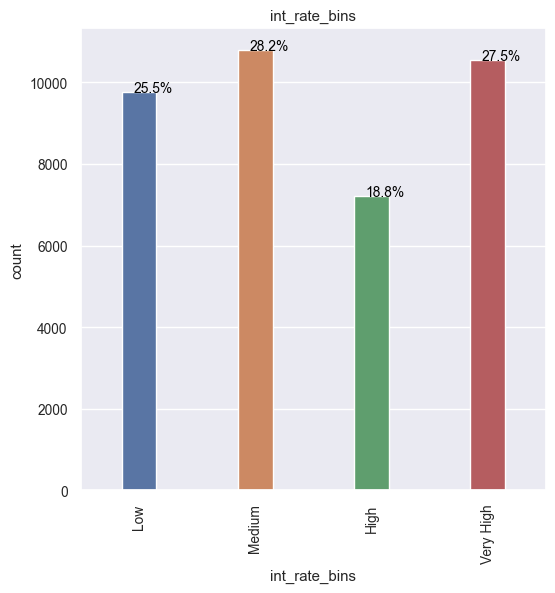

In [164]:
univariante_analysis('int_rate_bins')

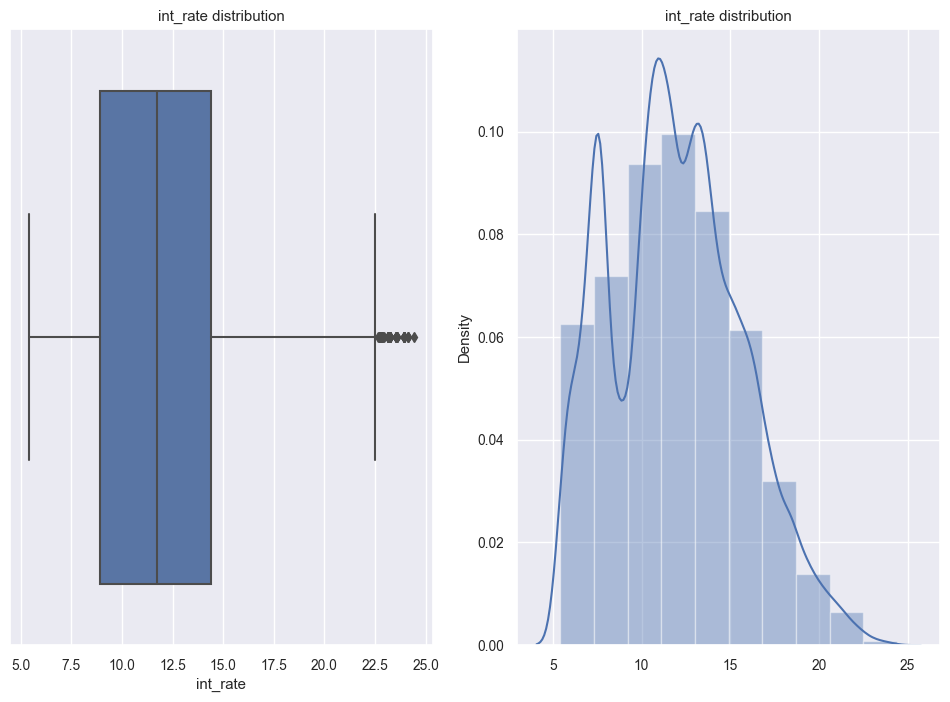

In [97]:
univariate_numerical('int_rate')

-- The **median interest rate** for a loan application is approximately **11.5%**,
   while 75% of the value is around 14.5%. However, there are outliers that go beyond the 22.5% threshold.

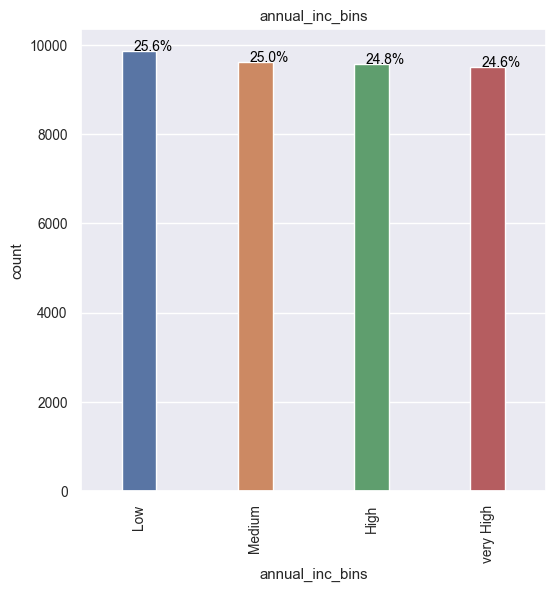

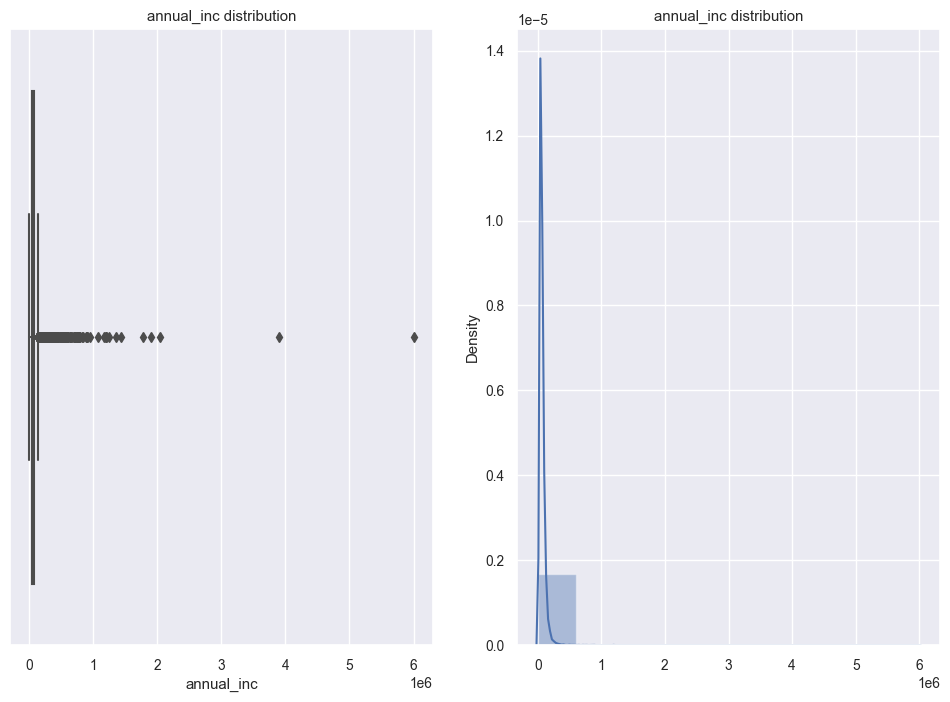

In [98]:
univariante_analysis('annual_inc_bins')
univariate_numerical('annual_inc')

-- Annual_inc having higher values so we are removing the outliers.

In [99]:
df = df[df['annual_inc'] <= 250000]

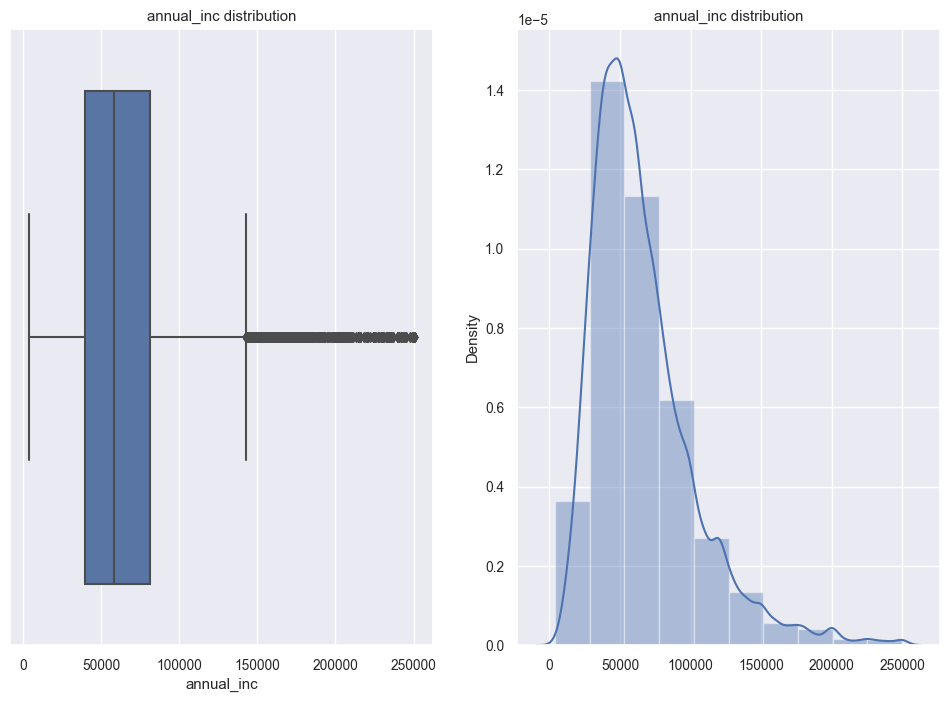

In [100]:
univariate_numerical('annual_inc')

-- It is worth noting that the majority of applicants fall within the annual income bracket of**₹50,000 to ₹75,000**.
   However, there are a significant number of outliers who exceed the ₹150,000 threshold.

### bivariate anlaysis

In [101]:
# A new column has been added to display the target variable as a numeric value.
df['new_status'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [102]:
def bivariate_catg(col1, col2):
    sns.set(font_scale=0.9)
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=df[col1], width=0.4, hue=df[col2])
    ht = []
    for p in ax.patches:
        x = p.get_height()
        ht.append(x)
    for p in ax.patches:
        txt = round((p.get_height() * 100 / sum(ht)), 1)
        t = ax.annotate(str(txt) + '%', xy=(p.get_x() + 0.09, p.get_height() + 1), size=10, color='black')

    plt.title(col1 + " " + " vs" + " " + col2)
    plt.xticks(rotation=90)
    plt.show()

In [103]:
def bivar_box(col):
    sns.boxplot(data=df, x='new_status', y=col)
    plt.show()

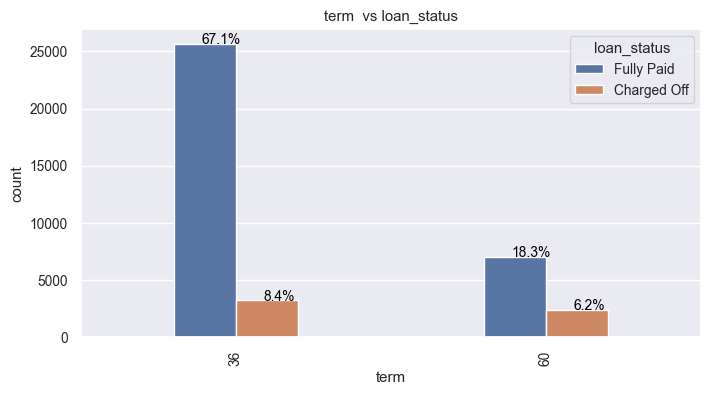

In [104]:
bivariate_catg('term', "loan_status")

-- The number of loan defaulters increases as the loan duration extends.
   The highest default rate of 8.4% is observed among those with a 36-month loan duration.

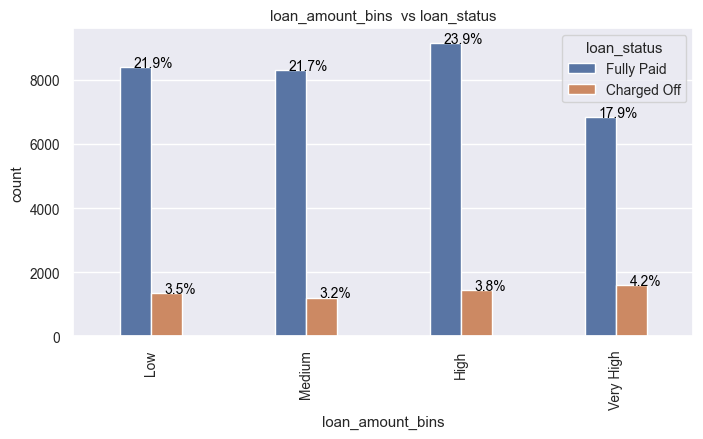

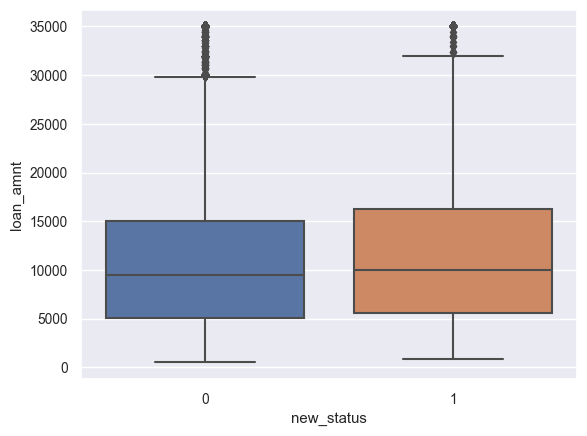

In [105]:
bivariate_catg('loan_amount_bins', 'loan_status')
bivar_box('loan_amnt')

-- Applicants tend to default as the loan amount increases.
   The highest rate of default is at a loan amount of 15000 and above.

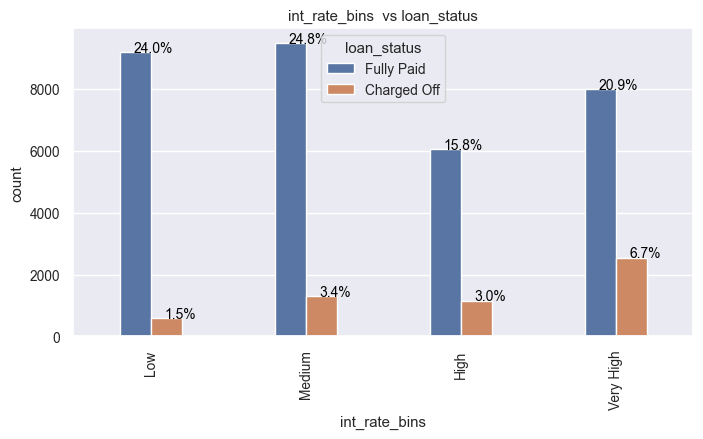

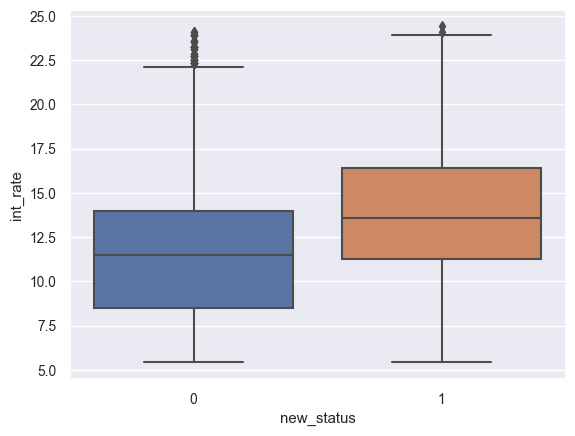

In [106]:
bivariate_catg('int_rate_bins', 'loan_status')
bivar_box('int_rate')

-- The median interest rate for defaulters is higher,indicating an elevated chance of default at rates above 14%.
   if the interest rate falls within the range of 8.5% and 11.5%,here exists a high likelihood that applicants will not default in the future.

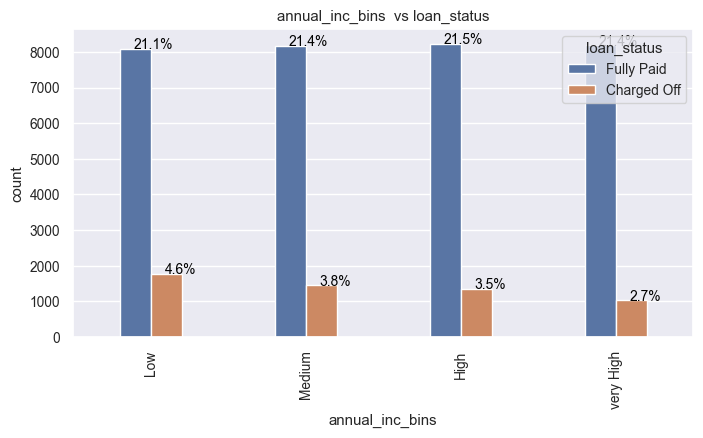

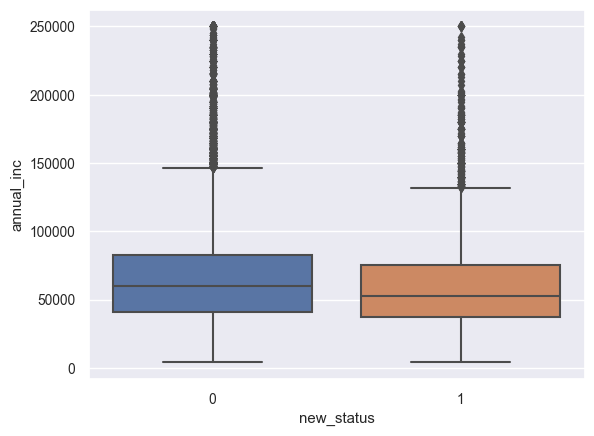

In [107]:
bivariate_catg('annual_inc_bins', 'loan_status')
bivar_box('annual_inc')

-- Applicants annual income increases the percentage of default decreases.
   If the applicants annual income is  in low category(less than 45000) then there is chance of
   applicants being default in future.

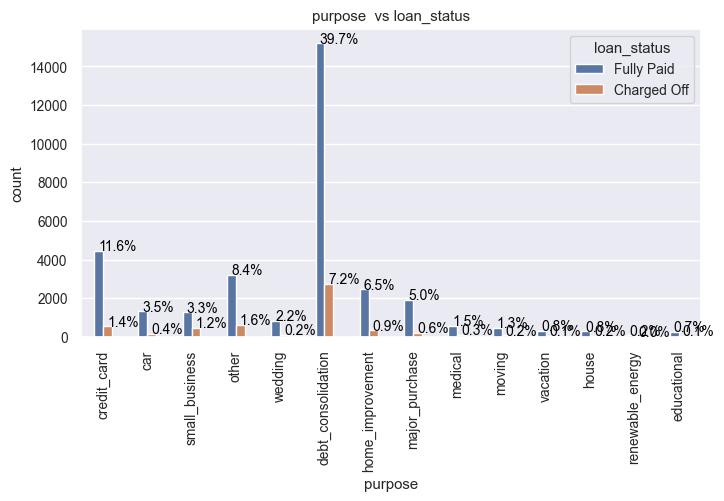

In [108]:
bivariate_catg('purpose', 'loan_status')

-- The percentage of defaulters is significantly higher among those who have applied for debt consolidation and small business loans.

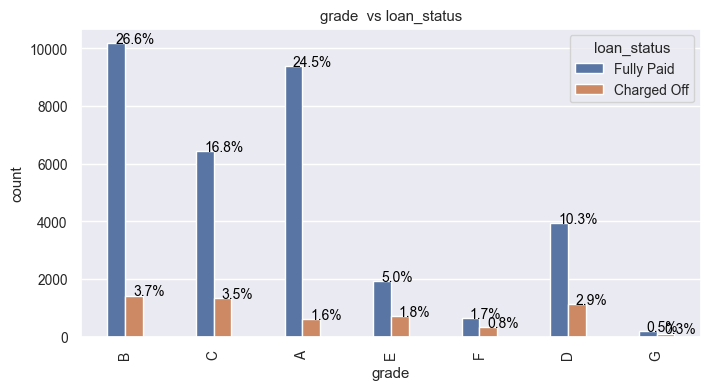

In [109]:
bivariate_catg('grade', 'loan_status')

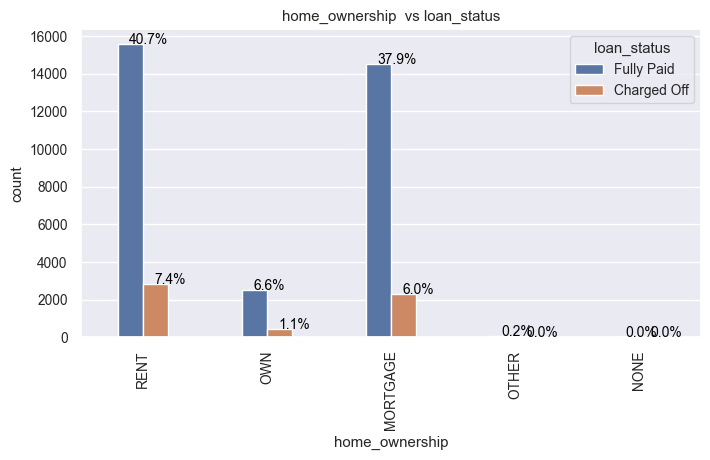

In [110]:
bivariate_catg('home_ownership', 'loan_status')

-- Based on home ownership, rent and mortgage applicants are like to be defaulters compared to owners.

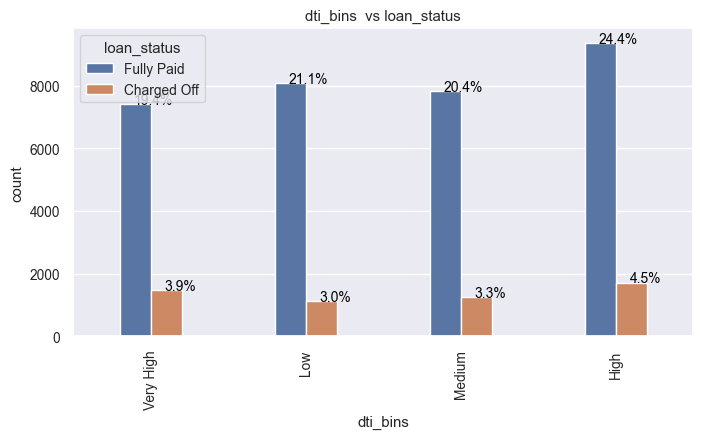

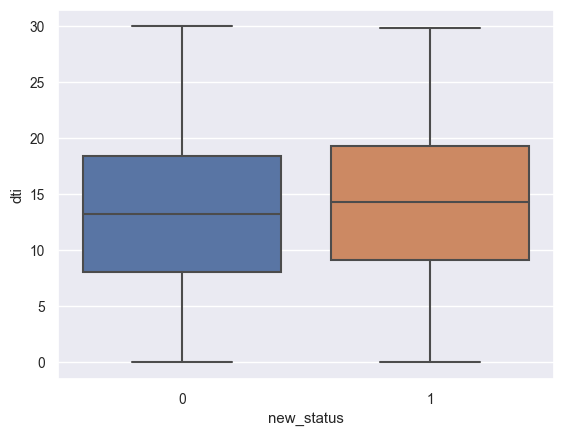

In [111]:
bivariate_catg('dti_bins', 'loan_status')
bivar_box('dti')

-- The debt to income levels are largely close in terms of the median ranges except a slightly higher DTI can be observed for charge offs.

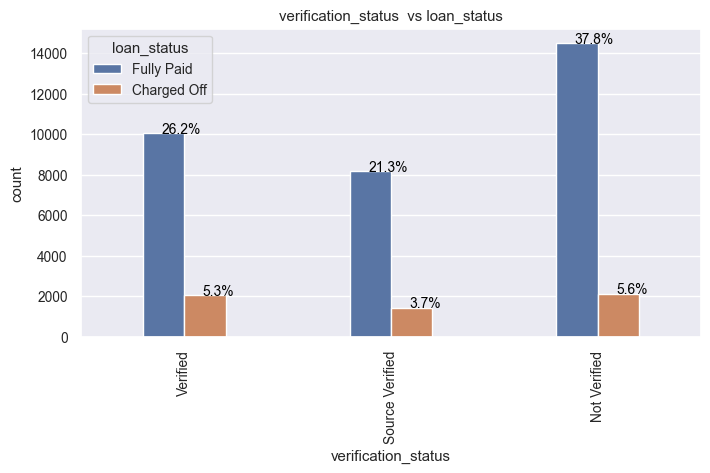

In [112]:
bivariate_catg('verification_status', 'loan_status')

-- The not-verified category has a high number of non-defaulter as well as defaulters.

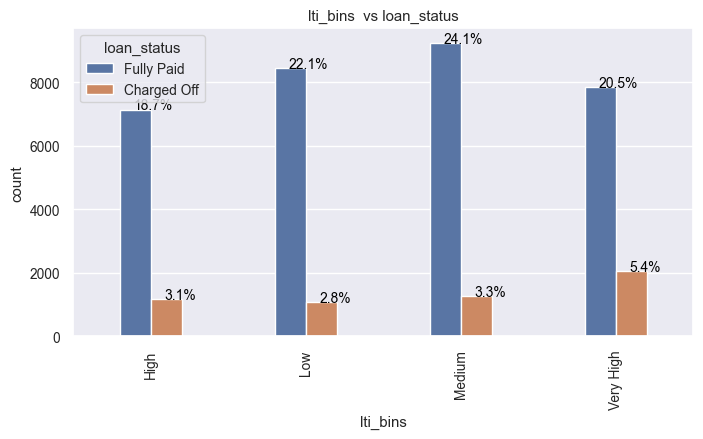

In [113]:
bivariate_catg('lti_bins', 'loan_status')

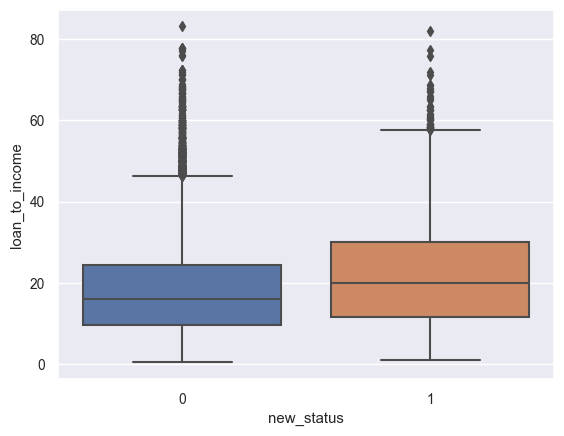

In [114]:
bivar_box('loan_to_income')

In [115]:
# analysis multiple varaibles using pair plots.
numerical_column = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc', 'emp_length',
                    'dti', 'installment', 'loan_status']

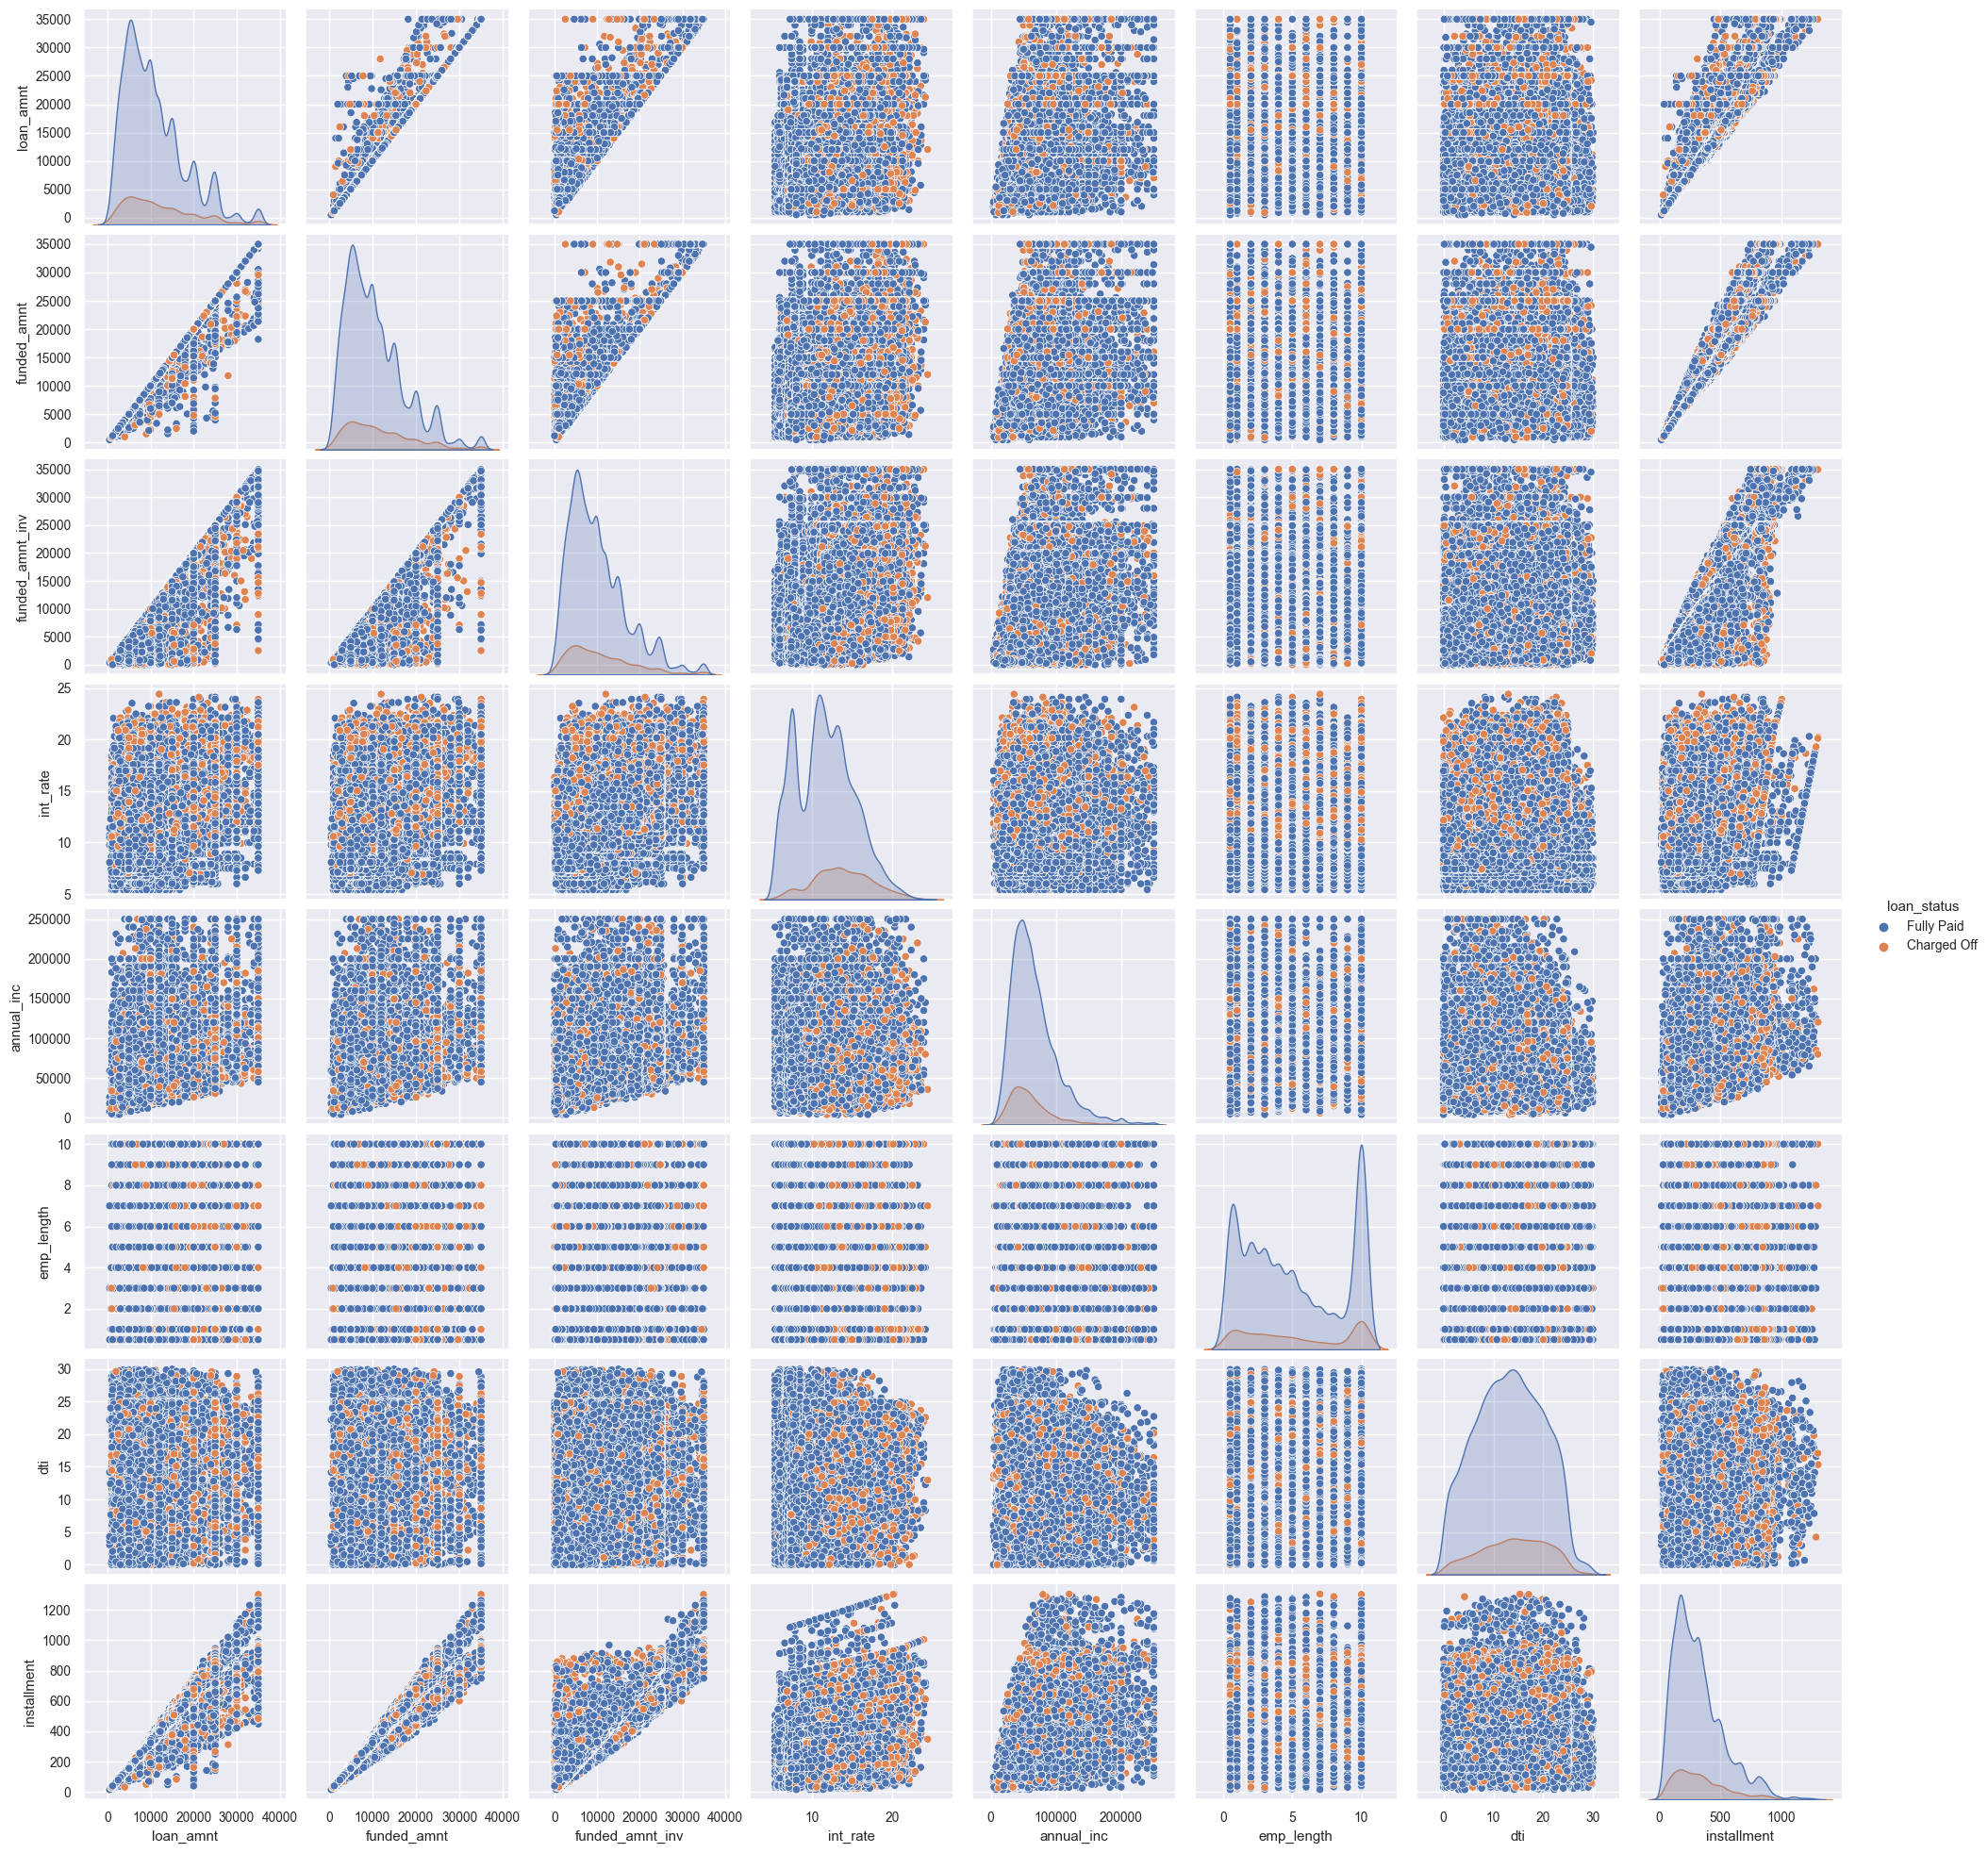

In [116]:
sns.pairplot(data=df[numerical_column], hue='loan_status')
plt.show()

1.Loan amnt vs. funded by inv - Not all loan amounts are funded by investors<br>
2.Loan amt vs. int rate - No clear pattern observed in the pair plot for default rate. However, in the in the interest rate KDE we can observe the area of default is larger when the interest rate goes up.<br>
3.Loan amt vs. installment - On the top right hand side, where the loan amnt is high and installment is high we dont observe many charge offs.<br>
4.Lower interest rate with lower annual incomes have a lower default same is the case with lower interest rate and lower DTI.<br>
5.As the loan amount increases, there is an increase in stallment. Lesser defaults observed for higher installments top RHS.<br>
6.Low annual income and high interest rates mean higher defaults.<br>

In [117]:
df_chargedoff = df[df['loan_status'] != 'Fully Paid']
print(df.shape)
print(df_chargedoff.shape)

(38284, 27)
(5596, 27)


### multivariate anlaysis

In [165]:
def multivaraite(col1, col2, col3, df):
    sns.set(font_scale=0.9,rc={"figure.dpi":300, 'savefig.dpi':300})
    ax = sns.barplot(data=df, x=col1, y=col2, hue=col3, estimator=np.mean, ci=None)
    ax.axhline(y=df[col2].mean(), color='black', linestyle='dashed', alpha=0.3)
    text = Text(x=0.01, y=df[col2].mean(), text=f'mean loan_amt: {round(df[col2].mean(), 1)}',
                color='black')
    ax._add_text(text)
    ax.legend(loc= 'center left',bbox_to_anchor=(1,0.5) )
    plt.show()

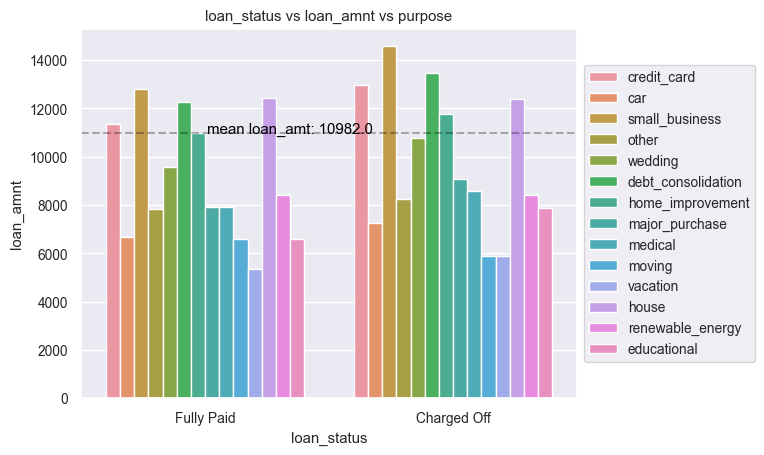

In [166]:
plt.title('loan_status vs loan_amnt vs purpose')
multivaraite('loan_status', 'loan_amnt', 'purpose', df)

-- Applicants who apply for loans for credit cards, small businesses, debt consolidation, or a house are more likely
   to default if their loan amount is above the mean of Rs 12,000.

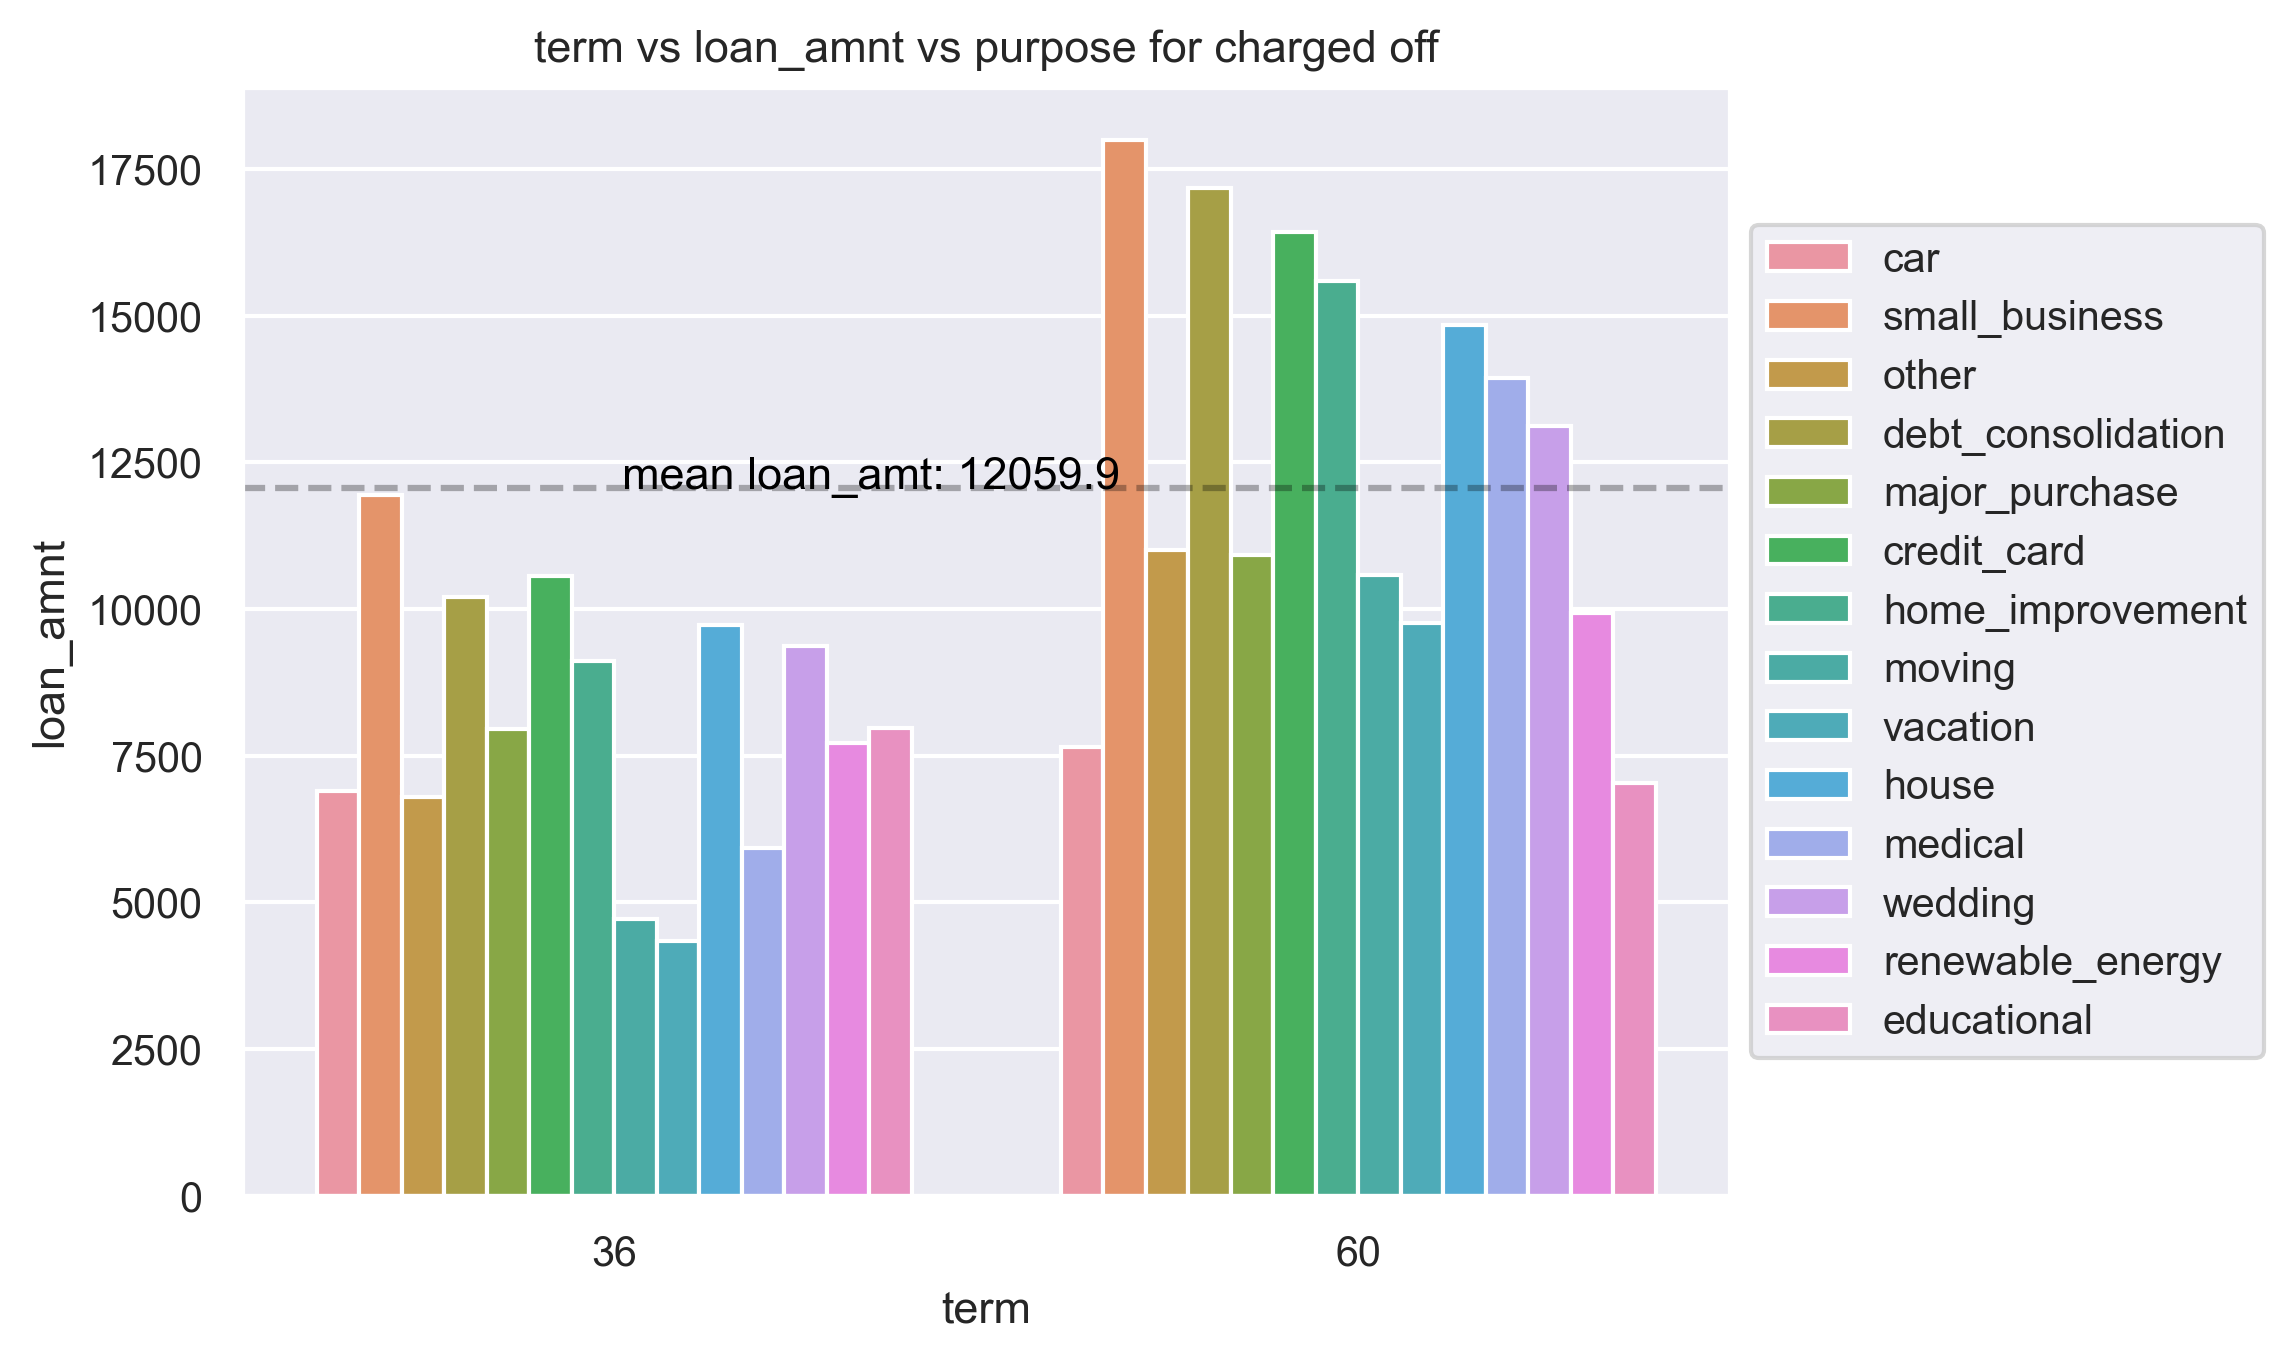

In [167]:
plt.title('term vs loan_amnt vs purpose for charged off')
multivaraite('term', 'loan_amnt', 'purpose', df_chargedoff)

--Applicants who apply for loans for small businesses, debt consolidation, credit cards, home improvements, medical expenses, or weddings
   are more likely to default if their loan amount exceeds the average of Rs 12,100 and has a duration of 60 months.
   
--There are more defaulters in loans with a duration of 60 months than in those
   with a duration of 30 months.

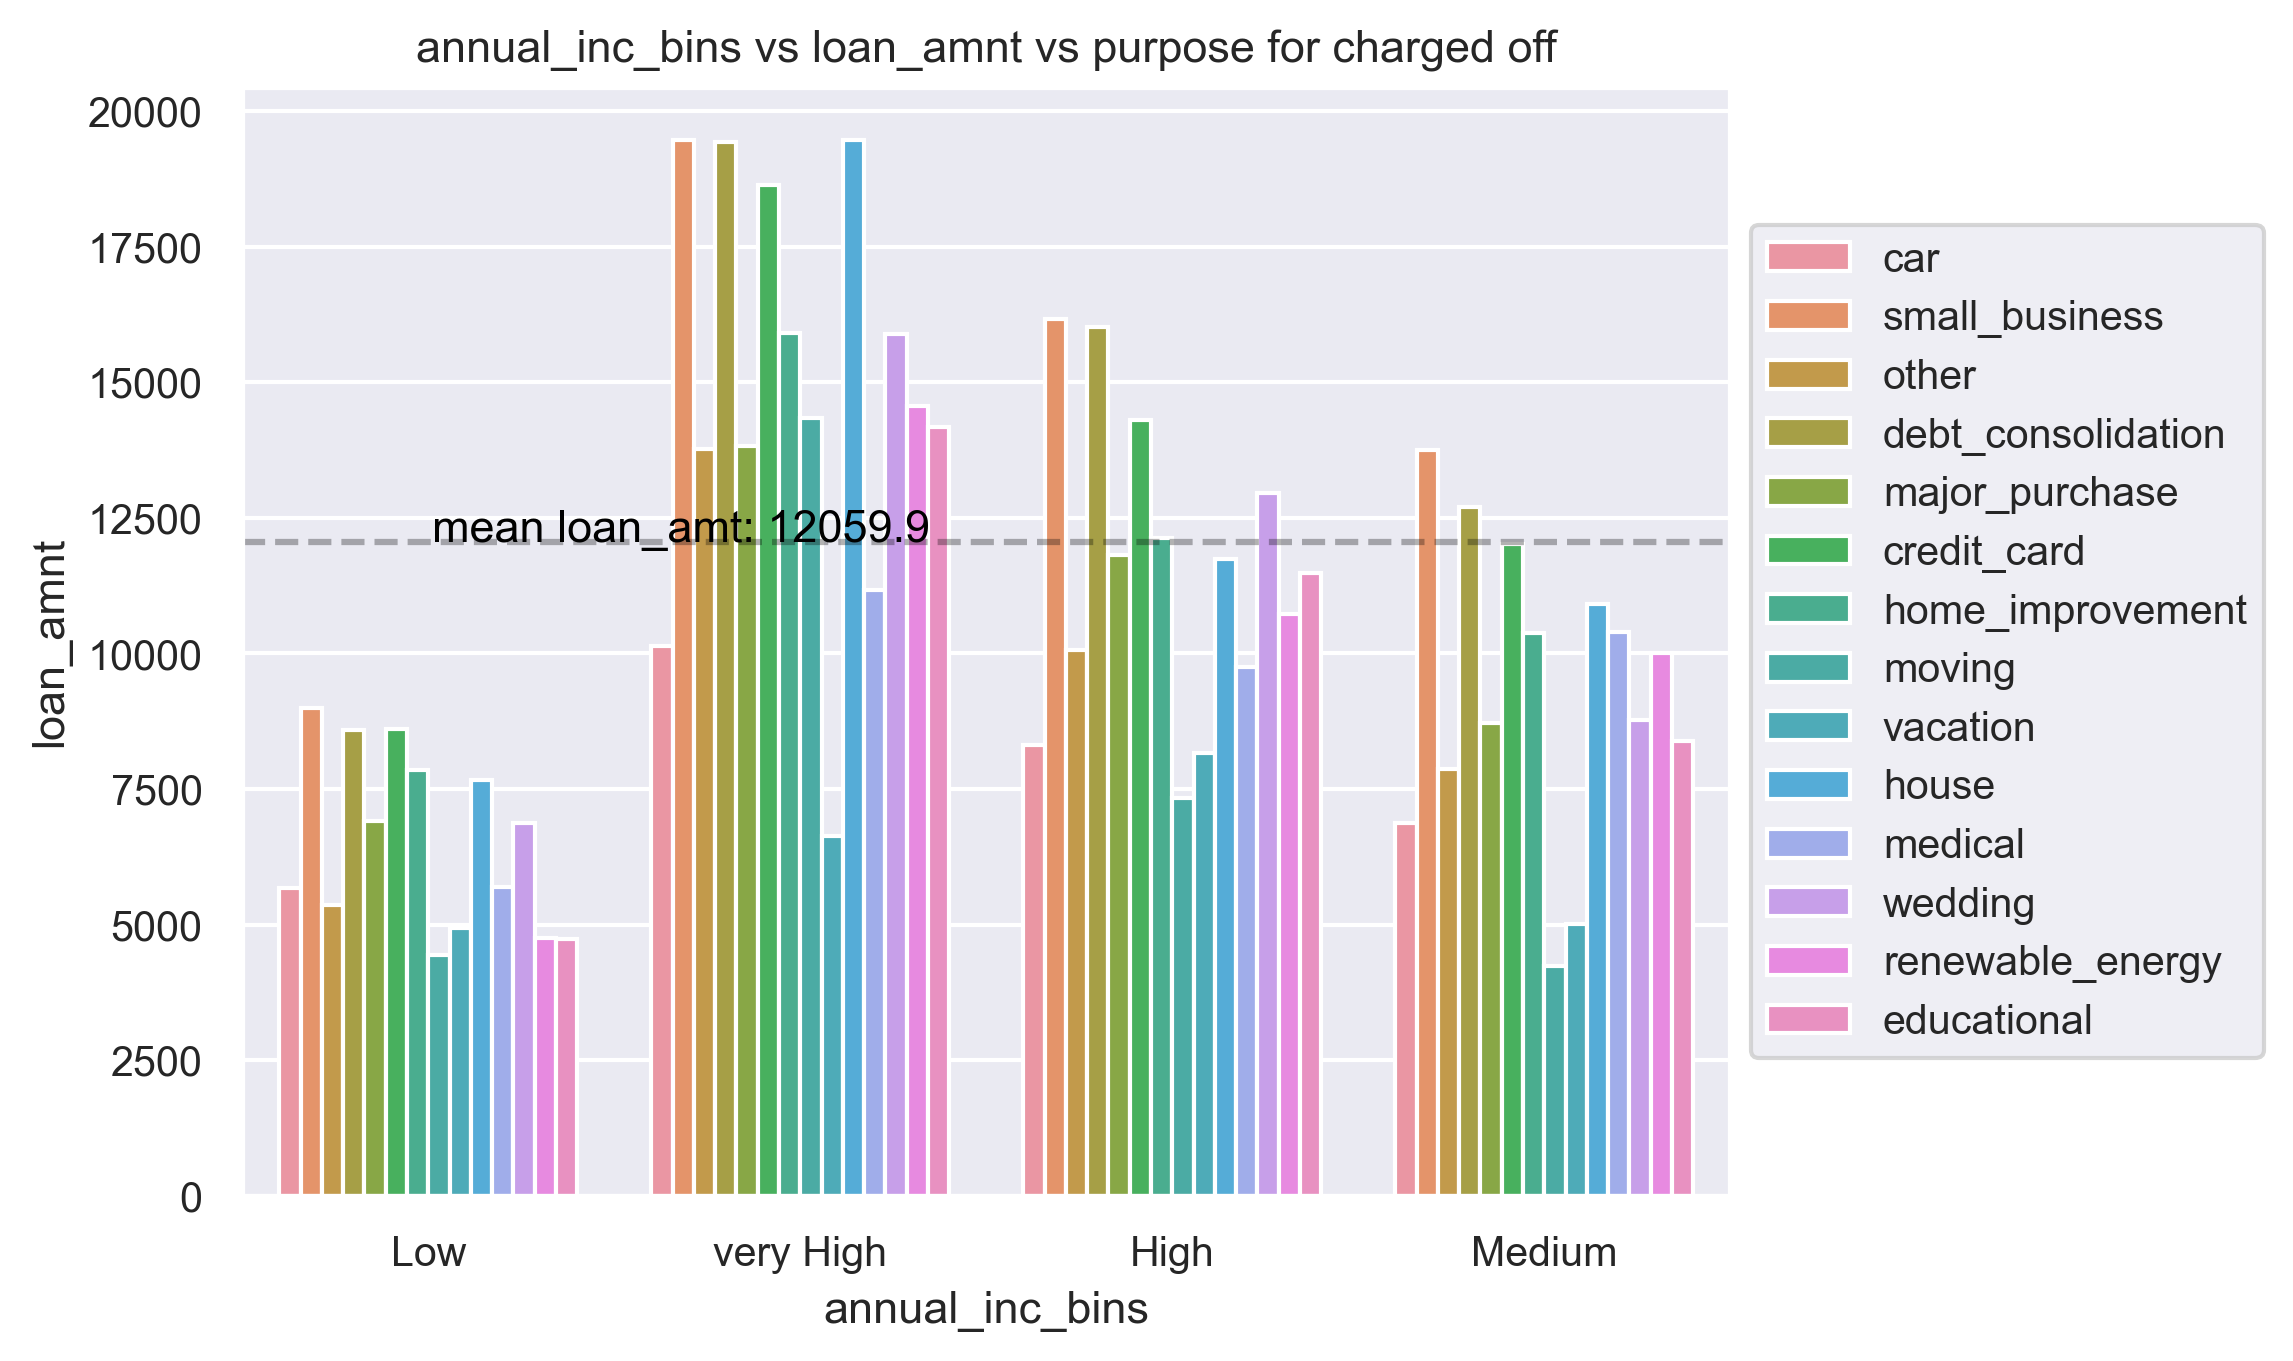

In [168]:
plt.title('annual_inc_bins vs loan_amnt vs purpose for charged off')
multivaraite('annual_inc_bins', 'loan_amnt', 'purpose', df_chargedoff)

-- The category with the very high annual income(>90,000) experiences the highest default rate compared to other categories.

-- The high-income category mainly applies for loans for small businesses, debt consolidation,credit cards, houses, weddings, and home improvements.

-- They are more likely to defaulters.

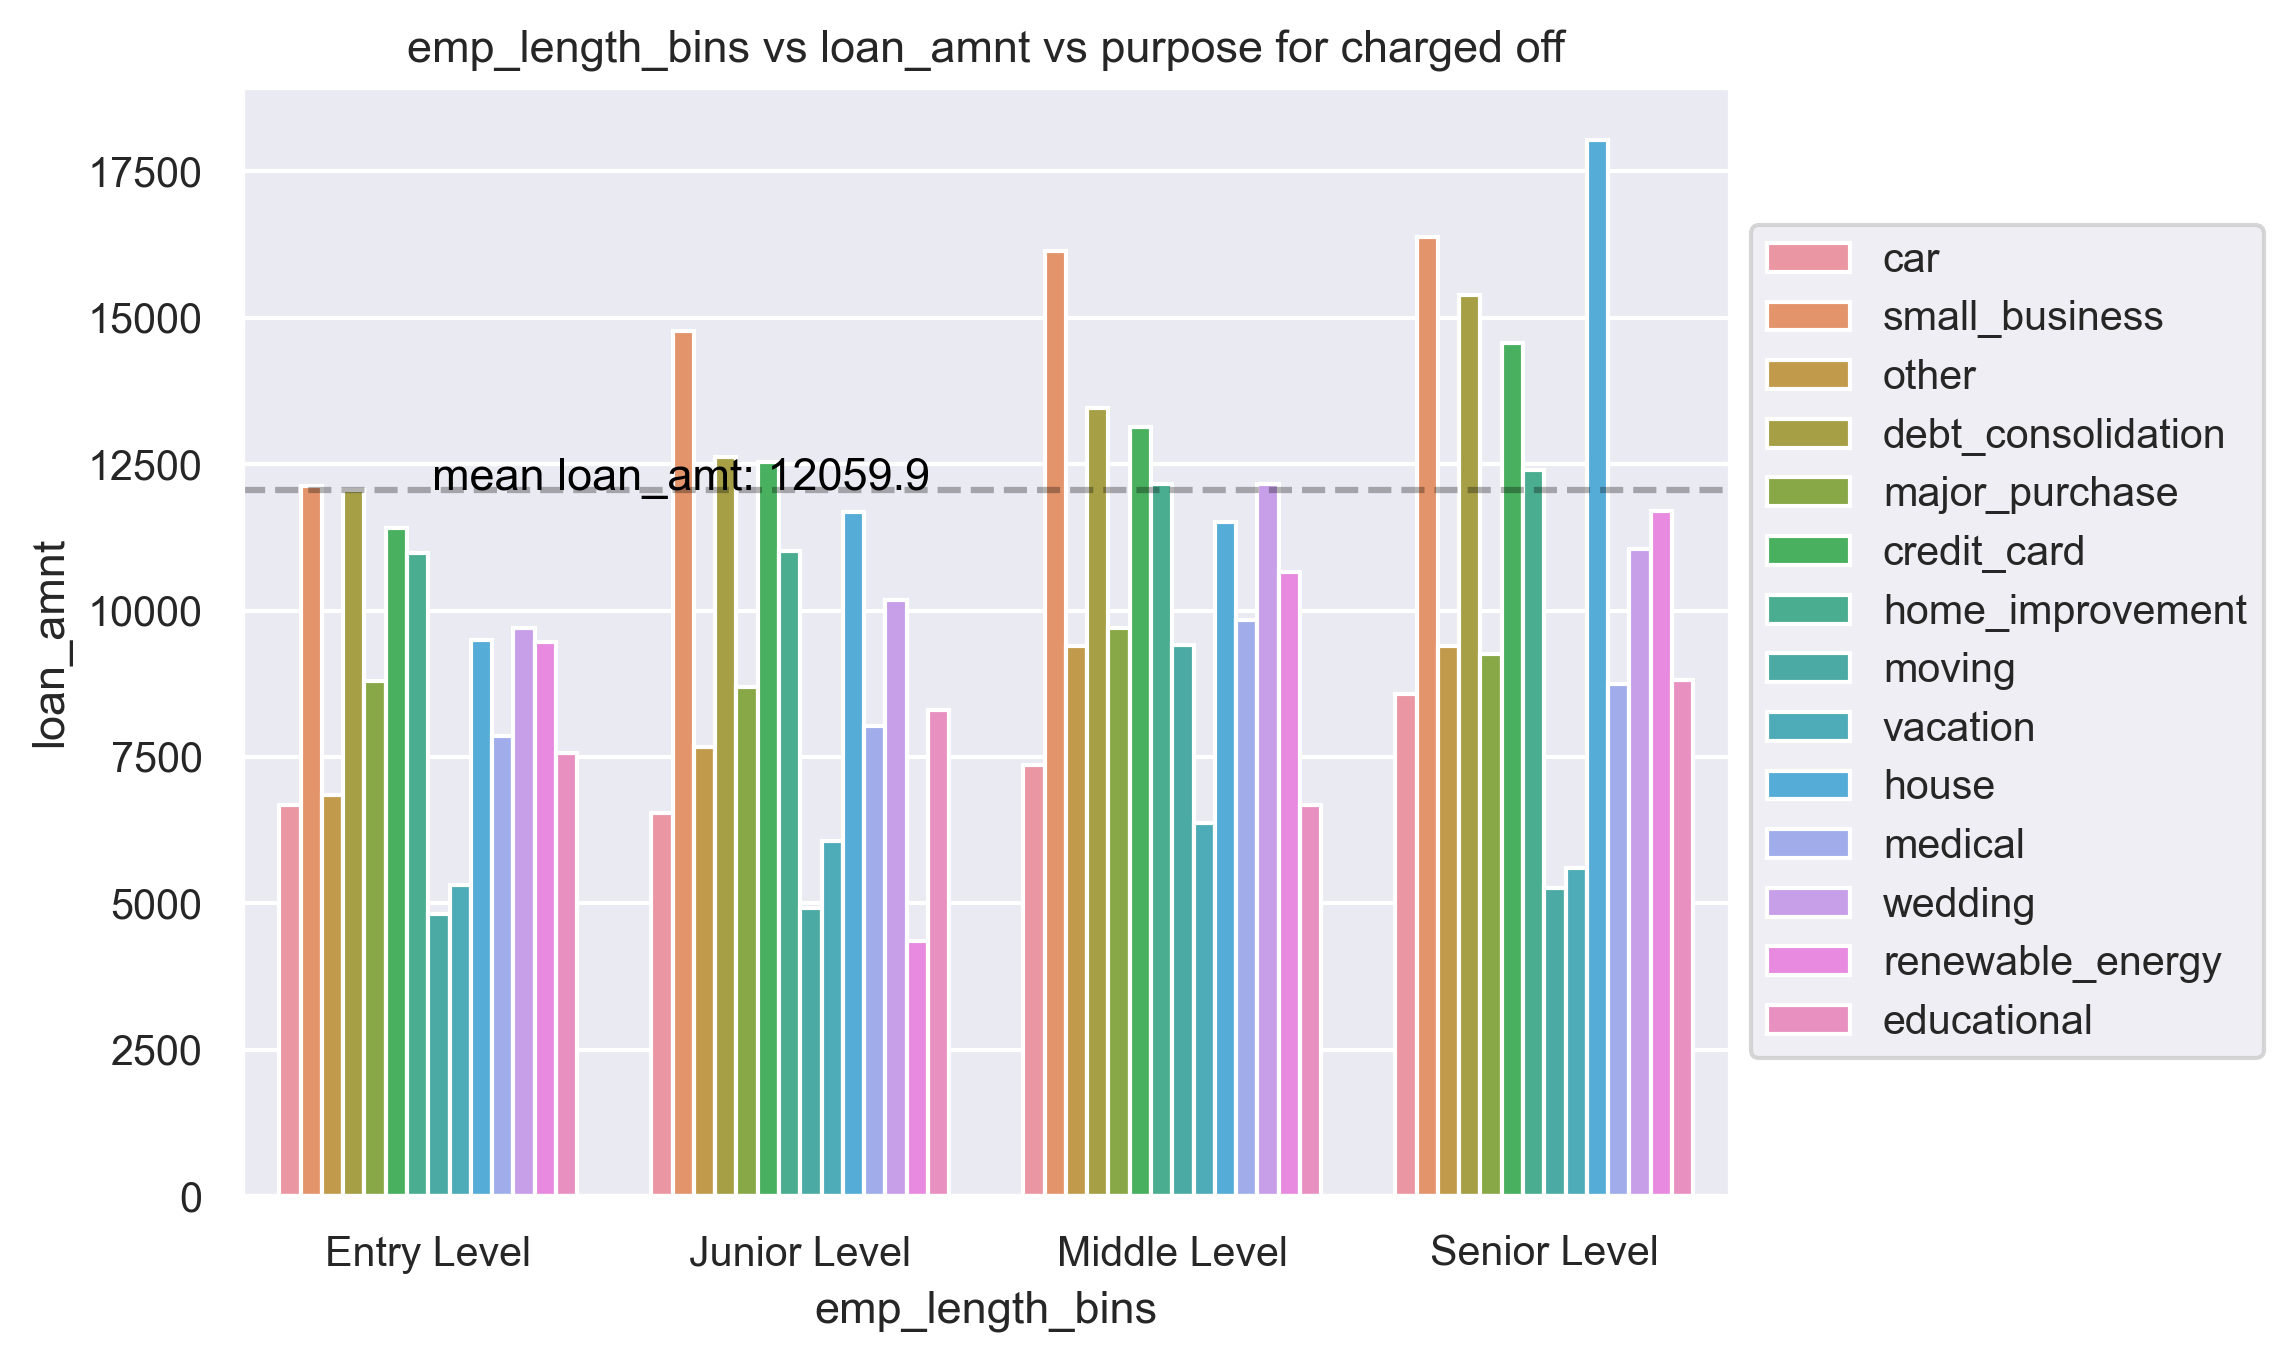

In [169]:
plt.title('emp_length_bins vs loan_amnt vs purpose for charged off')
multivaraite('emp_length_bins', 'loan_amnt', 'purpose', df_chargedoff)

-- The category with highest high experience level (senior level) experience highest default rate compare to all.

-- The senior level employee category mainly applies for for small business,debt consolidation, houses. they are more likely to defaulters.

### insights  and RECOMMENDATIONS

The major factors that influence charge-offs are<br>
                        1.interest rate, <br>
                        2.loan amount, <br>
                        3.annual income, <br>
                        4.verification status,<br>
                        5.home ownership status,<br>
                        6.loan grade, term, and<br>
                        7.purpose.


Recommendations:<br>
--- limit the loan amount to 15,000 beyond this range where charge off is higher.<br>
--- limit the interset rate to 14.5 % beyond this range where charge off is higher.<br>
--- Ensure verification is complete for all loans disbursed.<br>
--- Try to avoid loans beyond 12,000 for debit consolidation,credit card where charge off is high.<br>
--- focus on the employee who has 1.5 years to 8 years of experience where the charge-off is low.<br>
--- focus on loan for car and education which has low default rate.<br>